# FAIRe Qualitäts-KPIs
Autor:  Bastian Bickel
Datum:  1.11.2023

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Lässt sich die Nutzung der FAIR Prinzipien und das Benutzen der KPIs zur Erfüllung der Qualitätsdimensionen durch Anwendung auf ein einfach gehaltenens Beispiel, wie die Konstruktion eines Legofahrzeugs, erlernen und besser verstehen?

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:

Konstruieren eines simplen Fahrzeugs, welches den genannten Anforderungen entspricht, um dadurch die Verwendung von KPIs unter Berücksichtigung der FAIR Prinzipien zu erlernen und zu verstehen.

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


![Bild_Fahrzeug1](figures/Bild_Fahrzeug1.png)

Beschreiben Sie kurz und präzise Ihr Fahrzeug:

4 Räder
2 Technik Bricks(1x16) als Fahrgestell, nochmals quer verbunden durch 2 weitere Technik Bricks(1x10),davon einer grün gefärbt, auf denen sich die Baterie befindet
Motor treibt mit neutralem Getriebe die Antriebsachse an, Motor befindet sich über der Antriebsachse

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [1]:
import json
import pprint
from functions import calculation_rules
from functions.classes import *

In [2]:
# initialize components

#Hinzufügen der Module
from functions.classes import LegoComponent
from functions.classes import LegoAssembly
from functions.classes import AggregationLayer
from functions.classes import KPIEncoder
from functions.classes import print_assembly_tree

#Hinzufügen der Räder und Achsen
#importieren datasheet der Achsen
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)


#Vorderachse
front_axle = LegoComponent("front axle", axles["50451"])

#Hinterachse
back_axle = LegoComponent()
back_axle.properties["label"] = "back axle"
back_axle.properties.update(axles["50451"])

#Räder
#importieren datasheet der Räder
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)
#Vorderräder
front_wheel_left = LegoComponent("front wheel left", wheels["56904c02"])
front_wheel_right = LegoComponent("front wheel right", wheels["56904c02"])
#Hinterräder
back_wheel_left = front_wheel_left.clone("back wheel left")
back_wheel_right = front_wheel_right.clone("back wheel right")

#Fahrgestell
#importieren datasheet der Frames
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
#Große Bricks, welche die Achsen verbinden
big_frame_left = LegoComponent("big frame left", frame["3703"])
big_frame_right = LegoComponent("big frame right", frame["3703"])
#Kleine Bricks, welche die anderen Bricks verbinden und die Batterie halten
small_frame_front = LegoComponent("small frame front", frame["2730"])
small_frame_back = LegoComponent("small frame back", frame["2730"])

#Technic Bush
bush_getriebe = LegoComponent("bush getriebe", frame["3713"])
bush_frontaxle_left = LegoComponent("bush front axle left", frame["3713"])
bush_frontaxle_right = LegoComponent("bush front axle right", frame["3713"])
bush_backaxle_left = LegoComponent("bush back axle left", frame["3713"])
bush_backaxle_right = LegoComponent("bush back axle right", frame["3713"])


#technic Beam
beam = LegoComponent("beam", frame["32524"])

#Getriebe, Motor und Batterie
#importieren datasheet der Zahnräder
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
#Gear
gear_axle = LegoComponent("gear", gears["94925"])
gear_motor = LegoComponent("gear", gears["94925"])

#Verbindungswelle von Motor und Getriebe
small_axle = LegoComponent("small axel", axles["32073"])

#Motor
#importieren datasheet der Motoren
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
motor = LegoComponent("motor", motors["8883-1"])

#Batterie
#importieren datasheet der Batterien
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
batterie = LegoComponent("batterie", batteries["8878-1"])


In [3]:
# set properties

#Färben des hinteren Bricks(small_frame_back) in grün
small_frame_back.properties["color"] = "green"

In [4]:
# aggregate components

#Baugruppen
#Achsen und Räder zusammensetzen, erstellen des Fahrwerks
front_wheels_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "front wheels assembly", assembly_method = "stick together like lego blocks")
front_wheels_assembly.add([front_wheel_left, front_axle, front_wheel_right, bush_frontaxle_left,bush_frontaxle_right])

back_wheels_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "back wheels assembly", assembly_method = "stick together like lego blocks")
back_wheels_assembly.add([back_wheel_left, back_axle, back_wheel_right, bush_backaxle_left,bush_backaxle_right])

#Motor und Getriebe zusammensetzen, erstellen des Antriebs
drive_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "drive assembly", assembly_method = "stick together like lego blocks")
drive_assembly.add([motor, gear_motor, gear_axle, small_axle, beam, bush_getriebe])

#Batterie und Fahrgestell zusammensetzen
chassis_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "chassis assembly", assembly_method = "stick together like lego blocks") 
chassis_assembly.add([batterie, big_frame_left, big_frame_right, small_frame_front, small_frame_back])

#System
#Fahrzeug zusammensetzen
car1 = LegoAssembly(AggregationLayer.SYSTEM, "car1")
car1.add([front_wheels_assembly, back_wheels_assembly, drive_assembly, chassis_assembly])

print_assembly_tree(car1)

pprint.pprint(car1.properties)


LegoAssembly car1 [1f59b5f6-689f-4f96-9714-0ff89e3ef8fc]
├── LegoAssembly front wheels assembly [56019785-d4e2-4c92-a4d2-4f0a50cc3e01]
│   ├── LegoComponent front wheel left [a008f18f-d85f-4668-bda2-2285b70fc493]
│   ├── LegoComponent front axle [862f7941-2068-4119-be1e-b1412a9c1a19]
│   ├── LegoComponent front wheel right [4af3ac32-9797-4aaa-a02a-7330217e91d5]
│   ├── LegoComponent bush front axle left [0d959eff-c13d-44fe-b227-3b587bcb99e3]
│   └── LegoComponent bush front axle right [bd7e7a07-583c-4003-a43e-fa42ad985354]
├── LegoAssembly back wheels assembly [6ddb0c9d-d75b-48c1-84f6-b574d8042c4b]
│   ├── LegoComponent back wheel left [8c35e58c-2316-4d32-8567-eb67daddbeb3]
│   ├── LegoComponent back axle [4fb28c69-c056-43ab-b50a-a54c4d2c2edd]
│   ├── LegoComponent back wheel right [56d0185c-b40b-433c-83ce-14ac8bd94f8b]
│   ├── LegoComponent bush back axle left [009e14a2-5690-42e1-804b-888c5298f43d]
│   └── LegoComponent bush back axle right [b4edde88-5d93-455e-b747-3b3d200537a3]
├── L

### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

$$
a = \frac{b}{c} + d
$$

$$
a = \sum bi  
$$

$$
a = \max (bi)
$$

Um den Gesamtpreis und die Gesamtmasse zu errechnen wird die Summe des Preises/ der Masse aller Teile (bi) gebildet.
Um die Lieferzeit zu ermitteln, werden von allen Teilen (bi) die jeweilige Lieferzeit eingelesen und der Maximalwert wird herausgenommen.

Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [5]:
# calculate the KPIs for your car

# Import testen
calculation_rules.test_function()

#KPI Gesamtmasse
total_mass_car1 = calculation_rules.kpi_mass(car1) #aufrufen der Funktion in calculation_rules, um die Summe der Masse zu erhalten

car1.properties["mass [g]"] = total_mass_car1 #Gesamtmasse als Eigenschaft des Fahrzeugs hinzufügen


#KPI Gesamtpreis
total_price_car1 = calculation_rules.kpi_price(car1) #aufrufen der Funktion in calculation_rules, um die Summe des Preises zu erhalten

car1.properties["price [Euro]"] = total_price_car1 #Gesamtpreis als Eigenschaft des Fahrzeugs hinzufügen

#KPI Lieferzeit
delivery_time_car1 = calculation_rules.kpi_delivery_time(car1) #aufrufen der Funktion in calculation_rules, um die maximale Lieferzeit zu erhalten

car1.properties["delivery time [days]"] = delivery_time_car1 #Lieferzeit als Eigenschaft des Fahrzeugs hinzufügen

You called the test function.


In [6]:
# print your KPIs
print("Gesamtmasse: ", total_mass_car1, "g")
print("Gesamtpreis: ", total_price_car1, "Euro")
print("Lieferzeit: ", delivery_time_car1, "Tage")

Gesamtmasse:  199.31 g
Gesamtpreis:  77.561 Euro
Lieferzeit:  12 Tage


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [7]:
# export car and its properties
#Exportieren des ersten Fahrzeug, sowie dessen Eigenschaften und errechneten KPIs 
with open("car1.json", "w") as fp:
    json.dump(car1.to_dict(), fp, cls=KPIEncoder, indent=4)
    
#pprint.pprint(car1.to_dict())

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:

Beim zweiten Fahrzeug ist das Ziel, das Fahrzeug leichter und kleiner zu gestalten, um Gewicht einzusparen. Der Motor soll der gleiche wie beim ersten Fahrzeug bleiben, jedoch soll das Getriebe eine Übersetzung ins schnelle sein, wodurch das zweite Fahrzeug durch weniger Gewicht und schnellere Übersetzung höhere Geschwindigkeiten erreichen können sollte.
Die Qualitätsdimension die jedoch vorallem besser werden soll, ist der Aufwand durch weniger verwendetes Material.

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

![Bild_Fahrzeug2](figures/Bild_Fahrzeug2.png)

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

-4 kleine Räder, Vorder und Hinterachse
-Fahrgestell mit 2 1x14 Bricks, welche durch ein Open Center Brick verbunden sind
-Batterie auf dem Open Center Brick
-Medium Motor über der Hinterachse, welche die Hinterachse mithilfe eines Getriebes mit Übersetzung ins schnelle antreibt
-Open Center Brick ist lila gefärbt

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [8]:
# initialize components

#Hinzufügen Module
from functions.classes import LegoComponent
from functions.classes import LegoAssembly
from functions.classes import AggregationLayer
from functions.classes import KPIEncoder
from functions.classes import print_assembly_tree

#Achsen
#importeren datasheet Achsen
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
#Vorderachse    
front_axle = LegoComponent("front axle", axles["3708"])
#Hinterachse
back_axle = LegoComponent("back axle", axles["3708"])

#Räder
#importieren datasheet der Räder
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)
#Vorderräder
front_wheel_left = LegoComponent("front wheel left", wheels["3482c01"])
front_wheel_right = LegoComponent("front wheel right", wheels["3482c01"])
#Hinterräder
back_wheel_left = front_wheel_left.clone("back wheel left")
back_wheel_right = front_wheel_right.clone("back wheel right")

#Fahrgestell
#importieren datasheet der Frames
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
#Große Bricks, welche die Achsen verbinden
big_frame_left = LegoComponent("big frame left", frame["32018"])
big_frame_right = LegoComponent("big frame right", frame["32018"])

#Open Center Brick
center_frame = LegoComponent("center frame", frame["32531"])

#Getriebe, Motor und Batterie
#importieren datasheet der Zahnräder
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
#Gear
gear_axle = LegoComponent("gear", gears["94925"])
gear_motor = LegoComponent("gear", gears["32269"])

#Motor
#importieren datasheet der Motoren
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
motor = LegoComponent("motor", motors["8883-1"])

#Batterie
#importieren datasheet der Batterien
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
batterie = LegoComponent("batterie", batteries["8878-1"])

#Technic Bush, welche Zahnrad beim Motor fixiert
bush = LegoComponent("bush", frame["3713"])

#Verbindungswelle von Motor und Getriebe
small_axle = LegoComponent("small axle", axles["32073"])


In [9]:
# set properties

#Färben des Open Center Bricks 
center_frame.properties["color"] = "purple"

In [10]:
# aggregate components

#Baugruppen
#Achsen und Räder zusammensetzen, erstellen des Fahrwerks
front_wheels_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "front wheels assembly", assembly_method = "stick together like lego blocks")
front_wheels_assembly.add([front_wheel_left, front_axle, front_wheel_right])

back_wheels_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "front wheels assembly", assembly_method = "stick together like lego blocks")
back_wheels_assembly.add([back_wheel_left, back_axle, back_wheel_right])

#Motor und Getriebe zusammensetzen, erstellen des Antriebs
drive_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "drive assembly", assembly_method = "stick together like lego blocks")
drive_assembly.add([motor, gear_motor, gear_axle, small_axle, bush])

#Batterie und Fahrgestell zusammensetzen
chassis_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "chassis assembly", assembly_method = "stick together like lego blocks") 
chassis_assembly.add([batterie, big_frame_left, big_frame_right, center_frame])

#System
#Fahrzeug zusammensetzen
car2 = LegoAssembly(AggregationLayer.SYSTEM, "car2")
car2.add([front_wheels_assembly, back_wheels_assembly, drive_assembly, chassis_assembly])

print_assembly_tree(car2)
pprint.pprint(car2.properties)


LegoAssembly car2 [02de783b-fa48-401a-8819-a29efd967d69]
├── LegoAssembly front wheels assembly [457f1820-563d-49d3-9a33-e4e87af685f5]
│   ├── LegoComponent front wheel left [dd58b9d1-15cf-470c-8b5e-970552def921]
│   ├── LegoComponent front axle [3c52665f-033b-40f6-b288-96d650278e3f]
│   └── LegoComponent front wheel right [6fa0eb39-f48c-4064-ad4a-e796e034dc21]
├── LegoAssembly front wheels assembly [18d719dc-b8e1-4b4e-98b7-62ddc9035912]
│   ├── LegoComponent back wheel left [935e5a7e-851c-4523-adfb-3c71cceb8a5d]
│   ├── LegoComponent back axle [070fd43a-d8e7-4125-b7a2-b66888082889]
│   └── LegoComponent back wheel right [591ad077-1558-4927-a7aa-21e0c62c519f]
├── LegoAssembly drive assembly [f924becd-a370-4540-b5f9-c86b8b12199e]
│   ├── LegoComponent motor [d5e79a83-6b40-4524-beed-938c3e9c8f85]
│   ├── LegoComponent gear [5b2e90f0-dbf1-4208-a81a-bc0cea57a0b6]
│   ├── LegoComponent gear [d88134c1-f6e7-44a0-8063-173676b15f85]
│   ├── LegoComponent small axle [ab8e5468-a22c-4e63-b97e-7da1

### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [11]:
# calculate the KPIs for your car

#KPI Gesamtmasse
total_mass_car2 = calculation_rules.kpi_mass(car2) #aufrufen der Funktion in calculation_rules, um die Summe der Masse zu erhalten

car2.properties["mass [g]"] = total_mass_car2 #Gesamtmasse als Eigenschaft des Fahrzeugs hinzufügen


#KPI Gesamtpreis
total_price_car2 = calculation_rules.kpi_price(car2) #aufrufen der Funktion in calculation_rules, um die Summe des Preises zu erhalten

car2.properties["price [Euro]"] = total_price_car2 #Gesamtpreis als Eigenschaft des Fahrzeugs hinzufügen

#KPI Lieferzeit
delivery_time_car2 = calculation_rules.kpi_delivery_time(car2) #aufrufen der Funktion in calculation_rules, um die maximale Lieferzeit zu erhalten

car2.properties["delivery time [days]"] = delivery_time_car2 #Lieferzeit als Eigenschaft des Fahrzeugs hinzufügen

In [12]:
# print your KPIs
print("Gesamtmasse: ", total_mass_car2, "g")
print("Gesamtpreis: ", total_price_car2, "Euro")
print("Lieferzeit: ", delivery_time_car2, "Tage")

Gesamtmasse:  152.31999999999996 g
Gesamtpreis:  75.81099999999999 Euro
Lieferzeit:  13 Tage


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [13]:
# export car and its properties
#Exportieren des zweiten Fahrzeug, sowie dessen Eigenschaften und errechneten KPIs
with open("car2.json", "w") as fp:
    json.dump(car2.to_dict(), fp, cls=KPIEncoder, indent=4)

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

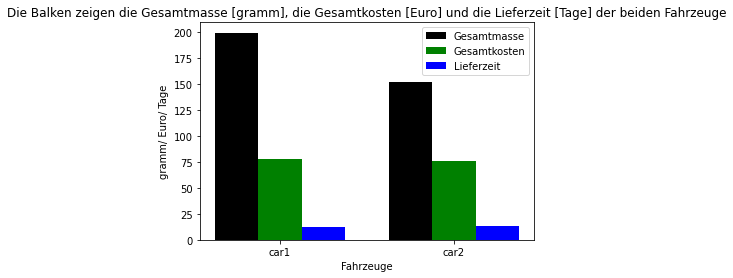

In [14]:
# plot the data, save diagramm as svg-file

#Importieren matplotlib und numpy Bibliothek
import matplotlib.pyplot as plt
import numpy as np

Fahrzeuge = ['car1', 'car2']
Gesamtmasse = [total_mass_car1, total_mass_car2]
Gesamtpreis = [total_price_car1, total_price_car2]
Lieferzeit = [delivery_time_car1, delivery_time_car2]


X = np.arange(len(Gesamtmasse))
#Balken einfügen und farblich kennzeichnen
plt.bar(X, Gesamtmasse, color = 'black', width = 0.25)
plt.bar(X + 0.25, Gesamtpreis, color = 'g', width = 0.25)
plt.bar(X + 0.5, Lieferzeit, color = 'b', width = 0.25)
#Legende erstellen
plt.legend(['Gesamtmasse', 'Gesamtkosten', 'Lieferzeit'])
#Fahrzeugnamen passend auf der x-Achse anordnen
plt.xticks([i + 0.25 for i in range(2)], ['car1', 'car2'])
#Titel hinzufügen
plt.title("Die Balken zeigen die Gesamtmasse [gramm], die Gesamtkosten [Euro] und die Lieferzeit [Tage] der beiden Fahrzeuge")
#x- und y-Label hinzufügen
plt.xlabel('Fahrzeuge')
plt.ylabel('gramm/ Euro/ Tage')

#Speichern als SVG-Datei:
plt.savefig('figures/Diagramm_Fahrzeuge.png') #als svg-Datei lies es sich nicht öffnen, nur eine leere Seite
plt.savefig('figures/Diagramm_Fahrzeuge_svg.png', format = 'svg')

plt.show()


Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Die gewünschte Verbesserung, also die Verringerung der Masse, konnte wie im Diagramm deutlich zu sehen erzielt werden(von 199 zu 152g). Dabei hat sich sogar ebenfalls der Preis sehr leicht verbessert (von 77 zu 75 Euro) und nur die Lieferteit ist um einen Tag gestiegen (von 12 auf 13 Tage). Daraus lässt sich schließen, dass die Qualität des zweiten Fahrzeugs wesentlich besser ist, in Bezug auf die Qualitätsdimensionen Aufwand und Akzeptabilität. Lediglich die Verfügbarkeit hat sich durch die Verbesserung der anderen beiden Dimensionen leicht verschlechtert. 

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

Die berechneten KPIs beschreiben die drei Qualitätsdimensionen Aufwand(Preis), Verfügbarkeit(Lieferzeit) und Akzeptabilität(Gewicht). Die entwickelten KPIs erfüllen die FAIR-Prinzipien, da sie "Findable" sind, durch die Abspeicherung in Gitlab, sowie "Accessible" durch den direkten Zugang zu GitLab und dem seperierten berechnen und aufrufen über die calculation_rules.py Funktion. Durch das exportieren des Fahrzeugs und der KPIs sind die Daten menschen- und maschinenlesbar, wodurch die KPIs auch "Interoperable" sind. Außerdem sind die KPIs "Reusable", was man an der Anwendung für beide erstellten Fahrzeuge sehen kann.

## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

Durch die Lerneinheit konnte ich die relevanten Aspekte der Qualitätsdimensionen und der FAIR-Prinzipien durch die Anwendung auf die erstellten Fahrzeuge und die entwickelten KPIs verstehen und nachvollziehen. Außerdem bin ich durch die Lerneinheit wieder besser mit der Nutzung von Python und Gitlab vertraut.